<a href="https://colab.research.google.com/github/isaaccs/sentiment-analysis-for-financial-news/blob/master/sentiment_analysis_for_financial_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install nltk
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!pip install .

Cloning into 'fastText'...
remote: Enumerating objects: 3826, done.
remote: Total 3826 (delta 0), reused 0 (delta 0), pack-reused 3826
Receiving objects: 100% (3826/3826), 8.20 MiB | 28.84 MiB/s, done.
Resolving deltas: 100% (2409/2409), done.
/content/fastText/fastText/fastText/fastText
Processing /content/fastText/fastText/fastText/fastText
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3013608 sha256=0fa7d4eb56694a602f4308922533866151a1e3a80d7f0a5664b45b1c1616fe8d
  Stored in directory: /tmp/pip-ephem-wheel-cache-wq4dr2st/wheels/d9/6c/f2/8f3d8e4e581c3c96001659c3355d9fc944dbbd9b447a21cb4d
Successfully built fasttext
  Found existing installation: fasttext 0.9.2
    Uninstalling fasttext-0.9.2:
      Successfully uninstalled fasttext-0.9.2


In [0]:
import pandas as pd
import nltk
import re
import numpy as np
import tensorflow as tf
import fasttext
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
url='https://raw.githubusercontent.com/isaaccs/sentiment-analysis-for-financial-news/master/all-data.csv'
data=pd.read_csv(url, encoding="cp1252",header=None)

In [0]:
data.columns = ['sentiment','text']
data

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [0]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
nltk.download('wordnet')

def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)


data['text']=data['text'].map(lambda s:preprocess(s)) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
def ngrams(input, n):
    output = []
    for i in range(len(input)-n+1):
        output.append('_'.join(input[i:i+n]))
    return output

In [0]:
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
#from nltk import ngrams
nltk.download('punkt')
tags = ['neutral','negative','positive'] 
# We already chose these tags at the beginning. It was supposed to happen here. 
# Since now on the original task equals the reduced version.

# To start our journey, we first need to tokenize the data
data_bis = data[data.sentiment.isin(tags)]
data_bis['Tokens'] = data_bis.apply(lambda row: nltk.word_tokenize(row['text'].strip()), axis=1)
data_bis['bi_Grams']  = data_bis.apply(lambda row: ngrams(row['Tokens'], 2), axis=1)
data_bis['tri_Grams']  = data_bis.apply(lambda row: ngrams(row['Tokens'], 3), axis=1)
print(len(data_bis),'samples from',len(tags),'classes')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
4846 samples from 3 classes


In [0]:
from collections import Counter
c_unique = Counter()
for ind in data_bis.index:
    c_unique.update(Counter(set(data_bis.loc[ind].Tokens)))

print('First 20 common words:\n')
for word in c_unique.most_common(20):
    print(word[0],'-->', 'appeared in',word[1],'documents out of {} documents i.e.'.format(len(data)),np.round(100*word[1]/len(data_bis),2),'%')

First 20 common words:

company --> appeared in 801 documents out of 4846 documents i.e. 16.53 %
eur --> appeared in 801 documents out of 4846 documents i.e. 16.53 %
said --> appeared in 544 documents out of 4846 documents i.e. 11.23 %
finnish --> appeared in 512 documents out of 4846 documents i.e. 10.57 %
sales --> appeared in 428 documents out of 4846 documents i.e. 8.83 %
profit --> appeared in 406 documents out of 4846 documents i.e. 8.38 %
net --> appeared in 384 documents out of 4846 documents i.e. 7.92 %
year --> appeared in 341 documents out of 4846 documents i.e. 7.04 %
finland --> appeared in 331 documents out of 4846 documents i.e. 6.83 %
million --> appeared in 311 documents out of 4846 documents i.e. 6.42 %
group --> appeared in 305 documents out of 4846 documents i.e. 6.29 %
operating --> appeared in 294 documents out of 4846 documents i.e. 6.07 %
new --> appeared in 261 documents out of 4846 documents i.e. 5.39 %
business --> appeared in 251 documents out of 4846 docume

<Figure size 7500x4500 with 0 Axes>

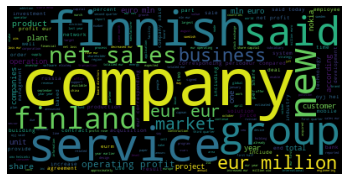

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 30), dpi=150, facecolor='w', edgecolor='k')
word_cloud_data = " ".join([post for post in data['text'] ])
word_cloud_data = WordCloud(stopwords=STOPWORDS).generate(word_cloud_data)
plt.figure()
plt.imshow(word_cloud_data)
plt.axis("off")
plt.savefig('test2png.png', dpi=300)


In [0]:
def stat_des_text(data,col,text,word,wordcloud=True):
  labels=data[col].unique()
  if wordcloud:
    for i in range(len(labels)):
      word_cloud_data = " ".join([post for (post,label) in zip(data[text],data[col]) if label==labels[i]])
      word_cloud_data = WordCloud(stopwords=STOPWORDS).generate(word_cloud_data)
      plt.figure(i)
      plt.imshow(word_cloud_data)
      plt.title('{}'.format(labels[i]))
      plt.axis("off")


  c_unique = Counter()
  for ind in data_bis.index:
    c_unique.update(Counter(set(data.loc[ind][word])))

  labels=data[col].unique()
  tag_dict = {tag:Counter() for tag in labels} 
  b=['_Words','_%']
  for ind in data.index:
      tag = data.loc[ind][col]
      tag_dict[tag].update(Counter(set(data.loc[ind][word])))
  tag_specific_words = pd.DataFrame(columns=[label+number for label in labels for number in b])
  for tag in labels:
      len_tag = len(data[data[col]==tag])
      words = []
      percent = []
      for word in tag_dict[tag].most_common(16):
          words.append(word[0])
          percent.append(np.round(100*word[1]/len_tag,2))
      tag_specific_words[tag+'_Words'] = words
      tag_specific_words[tag+'_%'] = percent
  display(tag_specific_words)


  for n_stop_words in [50,500,5000]:
      tag_specific_words = pd.DataFrame(columns=[label+number for label in tags for number in b])
      print('Ignoring first',n_stop_words,'stop-words ##############')
      StopWords = [ii[0] for ii in c_unique.most_common(n_stop_words)]
      print(StopWords)
      for tag in labels:
          len_tag = len(data[data[col]==tag])
          jj = 0
          words = []
          percent = []
          for word in tag_dict[tag].most_common(2*n_stop_words):
              if word[0] not in StopWords:
                  words.append(word[0])
                  percent.append(np.round(100*word[1]/len_tag,2))
                  jj += 1
              if jj == 20:
                  break
          tag_specific_words[tag+'_Words'] = words
          tag_specific_words[tag+'_%'] = percent
      display(tag_specific_words)
      print('\n\n')

,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,net_sales_eur,0.97,eur_corresponding_period,5.63,eur_corresponding_period,2.93
1,mln_euro_mln,0.94,decreased_eur_eur,2.98,rose_eur_eur,2.64
2,operating_profit_eur,0.69,compared_profit_eur,2.81,profit_rose_eur,2.42
3,eur_per_share,0.59,mln_euro_mln,2.48,mln_euro_mln,2.05
4,nasdaq_omx_helsinki,0.49,eur_compared_profit,2.32,first_nine_months,1.69
5,eur_net_sales,0.49,non_recurring_items,2.32,eur_million_usd,1.69
6,annual_general_meeting,0.45,eur_eur_corresponding,2.15,operating_profit_rose,1.54
7,stock_exchange_release,0.42,eur_compared_eur,2.15,eur_eur_corresponding,1.54
8,net_sales_mln,0.38,eur_million_usd,1.99,month_period_increased,1.39
9,sales_mln_euro,0.35,eur_first_half,1.99,net_profit_rose,1.32


Ignoring first 50 stop-words ##############
['eur_corresponding_period', 'mln_euro_mln', 'net_sales_eur', 'eur_million_usd', 'operating_profit_eur', 'rose_eur_eur', 'eur_eur_corresponding', 'earnings_per_share', 'profit_rose_eur', 'first_nine_months', 'per_share_eps', 'said_today_net', 'eur_million_eur', 'eur_net_sales', 'million_eur_million', 'eur_compared_eur', 'non_recurring_items', 'operating_profit_rose', 'stock_exchange_release', 'net_sales_increased', 'month_period_increased', 'compared_corresponding_period', 'eur_eur_year', 'expects_net_sales', 'eur_year_earlier', 'decreased_eur_eur', 'eur_per_share', 'net_profit_rose', 'eur_first_quarter', 'eur_third_quarter', 'totalled_eur_compared', 'sales_increased_eur', 'eur_compared_corresponding', 'today_net_profit', 'compared_profit_eur', 'period_increased_respectively', 'euro_mln_first', 'excluding_non_recurring', 'increased_eur_eur', 'increased_respectively_eur', 'euro_mln_period', 'corporation_omx_helsinki', 'mln_mln_euro', 'annual_g

,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,nasdaq_omx_helsinki,0.49,eur_compared_profit,2.32,net_loss_narrowed,0.95
1,net_sales_mln,0.38,eur_first_half,1.99,loss_narrowed_eur,0.88
2,sales_mln_euro,0.35,fell_eur_eur,1.82,operating_profit_net,0.81
3,headquartered_helsinki_finland,0.35,loss_totalled_eur,1.66,profit_net_sales,0.81
4,shares_voting_rights,0.31,operating_profit_excluding,1.66,eur_compared_loss,0.73
5,clear_overview_actual,0.31,profit_excluding_non,1.66,compared_loss_eur,0.66
6,situation_future_outlook,0.31,profit_fell_eur,1.66,year_year_eur,0.66
7,overview_actual_situation,0.31,operating_profit_fell,1.66,rose_eur_million,0.66
8,brand_new_market,0.31,profit_decreased_eur,1.66,first_quarter_eur,0.59
9,actual_situation_future,0.31,month_period_decreased,1.49,nine_months_eur,0.59





Ignoring first 500 stop-words ##############
['eur_corresponding_period', 'mln_euro_mln', 'net_sales_eur', 'eur_million_usd', 'operating_profit_eur', 'rose_eur_eur', 'eur_eur_corresponding', 'earnings_per_share', 'profit_rose_eur', 'first_nine_months', 'per_share_eps', 'said_today_net', 'eur_million_eur', 'eur_net_sales', 'million_eur_million', 'eur_compared_eur', 'non_recurring_items', 'operating_profit_rose', 'stock_exchange_release', 'net_sales_increased', 'month_period_increased', 'compared_corresponding_period', 'eur_eur_year', 'expects_net_sales', 'eur_year_earlier', 'decreased_eur_eur', 'eur_per_share', 'net_profit_rose', 'eur_first_quarter', 'eur_third_quarter', 'totalled_eur_compared', 'sales_increased_eur', 'eur_compared_corresponding', 'today_net_profit', 'compared_profit_eur', 'period_increased_respectively', 'euro_mln_first', 'excluding_non_recurring', 'increased_eur_eur', 'increased_respectively_eur', 'euro_mln_period', 'corporation_omx_helsinki', 'mln_mln_euro', 'annu

,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,euro_mln_operating,0.14,contract_manufacturer_scanfil,0.66,revenue_increased_eur,0.22
1,media_company_alma,0.10,eur_eur_first,0.66,sales_million_euros,0.22
2,company_alma_media,0.10,decreased_eur_million,0.66,percent_year_earlier,0.22
3,maximum_new_shares,0.10,based_steel_maker,0.50,went_year_year,0.22
4,stock_exchange_main,0.10,finland_based_steel,0.50,increase_net_sales,0.22
5,alma_media_shares,0.10,loss_eur_profit,0.50,compared_last_year,0.22
6,pohjola_bank_hel,0.10,net_loss_widened,0.50,largest_stainless_steel,0.22
7,sampo_bank_hel,0.10,start_personnel_negotiations,0.50,february_finnish_broadband,0.22
8,bank_hel_pohs,0.10,operating_loss_totaled,0.50,last_quarter_eur,0.22
9,bank_hel_samas,0.10,pretax_loss_totalled,0.50,quarter_eur_period,0.22





Ignoring first 5000 stop-words ##############
['eur_corresponding_period', 'mln_euro_mln', 'net_sales_eur', 'eur_million_usd', 'operating_profit_eur', 'rose_eur_eur', 'eur_eur_corresponding', 'earnings_per_share', 'profit_rose_eur', 'first_nine_months', 'per_share_eps', 'said_today_net', 'eur_million_eur', 'eur_net_sales', 'million_eur_million', 'eur_compared_eur', 'non_recurring_items', 'operating_profit_rose', 'stock_exchange_release', 'net_sales_increased', 'month_period_increased', 'compared_corresponding_period', 'eur_eur_year', 'expects_net_sales', 'eur_year_earlier', 'decreased_eur_eur', 'eur_per_share', 'net_profit_rose', 'eur_first_quarter', 'eur_third_quarter', 'totalled_eur_compared', 'sales_increased_eur', 'eur_compared_corresponding', 'today_net_profit', 'compared_profit_eur', 'period_increased_respectively', 'euro_mln_first', 'excluding_non_recurring', 'increased_eur_eur', 'increased_respectively_eur', 'euro_mln_period', 'corporation_omx_helsinki', 'mln_mln_euro', 'ann

,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,soft_drinks_mineral,0.03,earn_thousands_dollars,0.17,signed_mln_eur,0.07
1,waters_ciders_long,0.03,scamming_site_promising,0.17,engineering_first_hydrocopper,0.07
2,drinks_mineral_waters,0.03,users_earn_thousands,0.17,erdenet_mine_site,0.07
3,strengthen_market_share,0.03,goog_cash_advertiser,0.17,mongolia_erdenet_mining,0.07
4,target_strengthen_market,0.03,becoming_google_nasdaq,0.17,corporation_engineering_first,0.07
5,market_share_soft,0.03,users_scamming_site,0.17,mln_eur_agreement,0.07
6,drinks_energy_drinks,0.03,tinyurl_link_takes,0.17,eur_agreement_mongolia,0.07
7,long_drinks_energy,0.03,promising_users_earn,0.17,plant_built_erdenet,0.07
8,share_soft_drinks,0.03,dollars_becoming_google,0.17,outokumpu_technology_said,0.07
9,mineral_waters_ciders,0.03,nasdaq_goog_cash,0.17,afx_outokumpu_technology,0.07


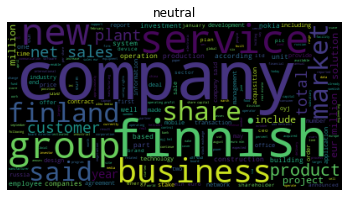

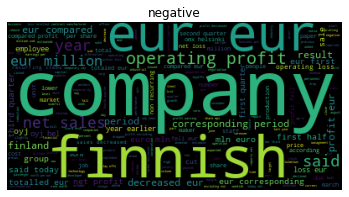

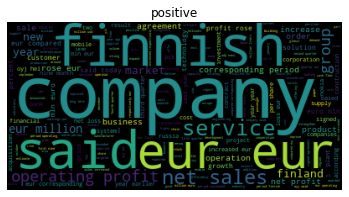

In [0]:
stat_des_text(data_bis,'sentiment','text','tri_Grams')